<a href="https://colab.research.google.com/github/prasannmodi/prasannmodi/blob/main/Python/Case%20Study/client_test_call_predict_PESQ/code_test_call_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Load required Library
import pandas as pd
import numpy as np
import os
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels
from sklearn.metrics import mean_squared_error

# Data Exploration and Preprocessing:

In [ ]:
# Dataset Path and File name
path = "C:\\Users\\so\\Desktop\\Prediction"
filename = "test_volume_data.csv"

In [ ]:
# Read Dataset
raw_data  = pd.read_csv(os.path.join(path, filename))

In [ ]:
# Make a copy of raw_data
dataset = raw_data.copy(deep=True)
dataset.head()

,company_id,company_type,date,avg_pesq_score,quality_too_poor,number_busy,temporarily_unable_test,outage_sec,number_test_types,numbers_tested,followup_tests,min_commit,has_min_commit,volume_tests,is_testing
0,1,Conference,2018-01-01,4.183942,1,86,0,6680.24,2,2562,0,100000.0,1,4590,1
1,2,Enterprise,2018-01-01,3.692000,4,246,0,2208.22,2,2410,100,400000.0,1,35405,1
2,4,Enterprise,2018-01-01,0.000000,0,1,0,0.00,1,207,0,1500.0,1,302,1
3,6,Conference,2018-01-01,3.971564,0,0,0,695.99,2,62,0,5715.0,1,167,1
4,10,Enterprise,2018-01-01,3.371562,0,0,0,0.00,1,13,0,NaN,0,672,1


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108760 entries, 0 to 108759
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   company_id               108760 non-null  int64  
 1   company_type             108760 non-null  object 
 2   date                     108760 non-null  object 
 3   avg_pesq_score           108760 non-null  float64
 4   quality_too_poor         108760 non-null  int64  
 5   number_busy              108760 non-null  int64  
 6   temporarily_unable_test  108760 non-null  int64  
 7   outage_sec               108760 non-null  float64
 8   number_test_types        108760 non-null  int64  
 9   numbers_tested           108760 non-null  int64  
 10  followup_tests           108760 non-null  int64  
 11  min_commit               53438 non-null   float64
 12  has_min_commit           108760 non-null  int64  
 13  volume_tests             108760 non-null  int64  
 14  is_t

In [ ]:
dataset.describe()

,company_id,avg_pesq_score,quality_too_poor,number_busy,temporarily_unable_test,outage_sec,number_test_types,numbers_tested,followup_tests,min_commit,has_min_commit,volume_tests,is_testing
count,108760.000000,108760.000000,108760.000000,108760.000000,108760.000000,108760.000000,108760.000000,108760.000000,108760.000000,53438.000000,108760.000000,108760.000000,108760.000000
mean,125.176039,1.699100,1.314472,12.621193,1.294741,555.385070,0.930259,68.404800,2.861144,16190.347805,0.490787,708.848225,0.644299
std,91.748759,1.911411,10.639462,65.676710,16.308267,1857.663796,1.097530,331.447922,28.663227,58876.738409,0.499917,4129.420527,0.478727
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,56.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,607.000000,0.000000,0.000000,0.000000
50%,116.000000,0.000000,0.000000,0.000000,0.000000,24.000000,1.000000,2.000000,0.000000,2000.000000,0.000000,26.000000,1.000000
75%,187.000000,3.827740,0.000000,3.000000,0.000000,192.000000,2.000000,36.000000,0.000000,7200.000000,1.000000,196.250000,1.000000
max,455.000000,4.500000,627.000000,4492.000000,1258.000000,30167.840000,6.000000,4927.000000,3844.000000,400000.000000,1.000000,57105.000000,1.000000


In [ ]:
# Check % of Null values in data
dataset.isnull().sum()/dataset.shape[0]*100

company_id                  0.000000
company_type                0.000000
date                        0.000000
avg_pesq_score              0.000000
quality_too_poor            0.000000
number_busy                 0.000000
temporarily_unable_test     0.000000
outage_sec                  0.000000
number_test_types           0.000000
numbers_tested              0.000000
followup_tests              0.000000
min_commit                 50.866127
has_min_commit              0.000000
volume_tests                0.000000
is_testing                  0.000000
dtype: float64

In [ ]:
# Extracting temporal features
dataset["year"] = pd.to_datetime(dataset["date"]).dt.year
dataset["day_of_week"] = pd.to_datetime(dataset["date"]).dt.dayofweek
dataset["month"] = pd.to_datetime(dataset["date"]).dt.month
dataset.describe()

,company_id,avg_pesq_score,quality_too_poor,number_busy,temporarily_unable_test,outage_sec,number_test_types,numbers_tested,followup_tests,min_commit,has_min_commit,volume_tests,is_testing,year,day_of_week,month
count,108760.000000,108760.000000,108760.000000,108760.000000,108760.000000,108760.000000,108760.000000,108760.000000,108760.000000,53438.000000,108760.000000,108760.000000,108760.000000,108760.000000,108760.000000,108760.000000
mean,125.176039,1.699100,1.314472,12.621193,1.294741,555.385070,0.930259,68.404800,2.861144,16190.347805,0.490787,708.848225,0.644299,2019.350772,2.996644,6.241366
std,91.748759,1.911411,10.639462,65.676710,16.308267,1857.663796,1.097530,331.447922,28.663227,58876.738409,0.499917,4129.420527,0.478727,0.895757,1.999347,3.544940
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2018.000000,0.000000,1.000000
25%,56.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,607.000000,0.000000,0.000000,0.000000,2019.000000,1.000000,3.000000
50%,116.000000,0.000000,0.000000,0.000000,0.000000,24.000000,1.000000,2.000000,0.000000,2000.000000,0.000000,26.000000,1.000000,2019.000000,3.000000,6.000000
75%,187.000000,3.827740,0.000000,3.000000,0.000000,192.000000,2.000000,36.000000,0.000000,7200.000000,1.000000,196.250000,1.000000,2020.000000,5.000000,9.000000
max,455.000000,4.500000,627.000000,4492.000000,1258.000000,30167.840000,6.000000,4927.000000,3844.000000,400000.000000,1.000000,57105.000000,1.000000,2021.000000,6.000000,12.000000


In [ ]:
# Filter & Consider Active clients only from Dataset with is_testing as 1
filtered_df = dataset.query("is_testing != 0")
print(dataset.shape);print(filtered_df.shape)

(108760, 18)
(70074, 18)


In [ ]:
# Check % of Null values in data
filtered_df["min_commit"].isnull().sum()/filtered_df.shape[0]*100

36.833918429089245

# Feature Selection and Engineering:

In [ ]:
# Create data copy
df = filtered_df.copy(deep=True)

# Aggregating test types
df["total_tests"] = df["numbers_tested"] + df["followup_tests"]

# Creating a ratio feature
df["followup_ratio"] = df["followup_tests"] / df["numbers_tested"]

# Interaction feature
df["pesq_times_tests"] = df["avg_pesq_score"] * df["numbers_tested"]

# Binning avg_pesq_score
bins = [0, 3.5, 4.0, np.inf]
labels = [0, 1, 2]
df["pesq_quality"] = pd.cut(df["avg_pesq_score"], bins=bins, labels=labels)

# Impute missing values (replace NaNs with Low)
df['pesq_quality'].fillna(0, inplace=True)
df['followup_ratio'].fillna(0, inplace=True)

# Drop unnecessary columns
# df.drop(columns=["date"], inplace=True)

# Now df contains the engineered features
print(df.head())

   company_id company_type        date  avg_pesq_score  quality_too_poor  \
0           1   Conference  2018-01-01        4.183942                 1   
1           2   Enterprise  2018-01-01        3.692000                 4   
2           4   Enterprise  2018-01-01        0.000000                 0   
3           6   Conference  2018-01-01        3.971564                 0   
4          10   Enterprise  2018-01-01        3.371562                 0   

   number_busy  temporarily_unable_test  outage_sec  number_test_types  \
0           86                        0     6680.24                  2   
1          246                        0     2208.22                  2   
2            1                        0        0.00                  1   
3            0                        0      695.99                  2   
4            0                        0        0.00                  1   

   numbers_tested  ...  has_min_commit  volume_tests  is_testing  year  \
0            2562  ...  

In [ ]:
# Df features
key_cols = ["company_id", "company_type", "date"]
target_col = "volume_tests"
drop_cols = ["is_testing","min_commit"]
numeric_cols = list(df.loc[:, df.dtypes != object].columns)
feature_cols = list(set(numeric_cols) - set(key_cols))
feature_cols = list(set(feature_cols) - set(drop_cols))
feature_cols

['numbers_tested',
 'outage_sec',
 'pesq_times_tests',
 'month',
 'total_tests',
 'quality_too_poor',
 'temporarily_unable_test',
 'pesq_quality',
 'avg_pesq_score',
 'followup_tests',
 'day_of_week',
 'volume_tests',
 'followup_ratio',
 'number_test_types',
 'has_min_commit',
 'number_busy',
 'year']

# Data Visualization:

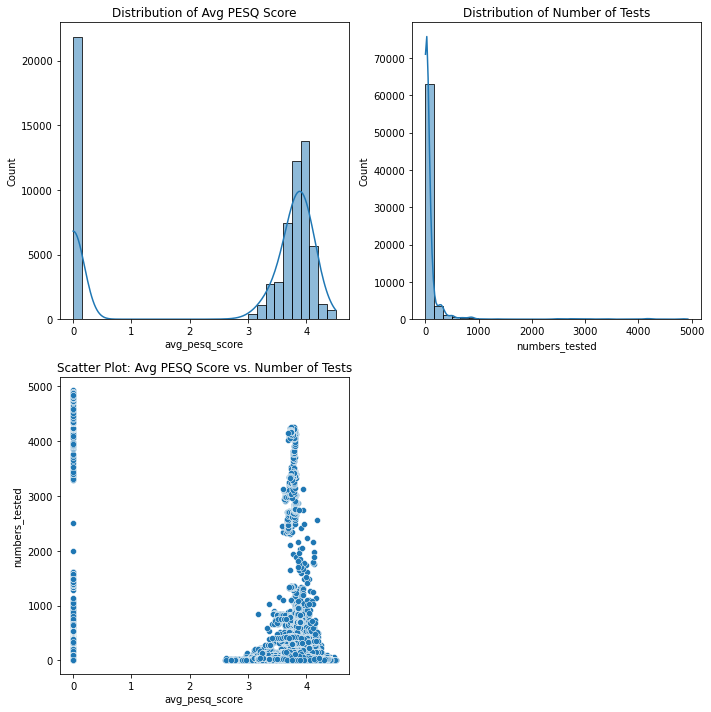

In [ ]:
# Plot histograms for relevant features
plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1)
sns.histplot(df["avg_pesq_score"], bins=30, kde=True)
plt.title("Distribution of Avg PESQ Score")

plt.subplot(2, 2, 2)
sns.histplot(df["numbers_tested"], bins=30, kde=True)
plt.title("Distribution of Number of Tests")

# Create a scatter plot
plt.subplot(2, 2, 3)
sns.scatterplot(x="avg_pesq_score", y="numbers_tested", data=df)
plt.title("Scatter Plot: Avg PESQ Score vs. Number of Tests")

plt.tight_layout()
plt.show()

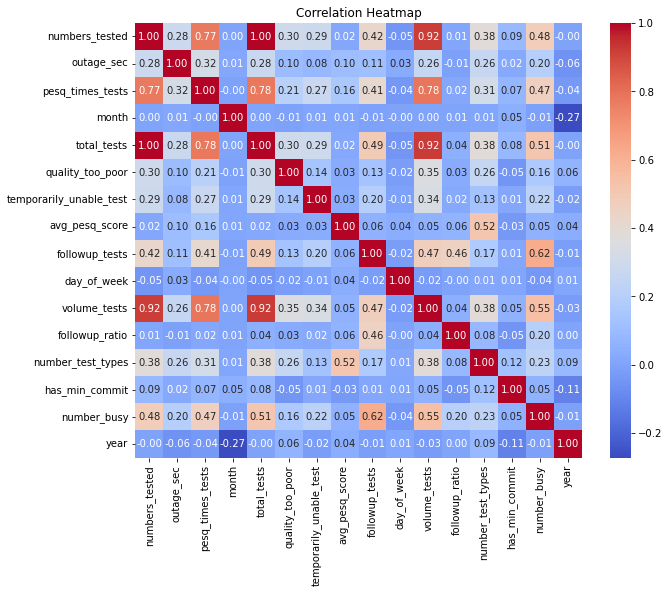

In [ ]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df[feature_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
# Types of Company utilizing service YOY
company_yoy = df.groupby(["company_type","year"]).size()
company_yoy = pd.DataFrame(company_yoy)
company_yoy.reset_index(inplace = True)
company_yoy.rename(columns={0: 'count'}, inplace=True)
company_yoy.tail()

,company_type,year,count
7,Conference,2021,683
8,Enterprise,2018,11801
9,Enterprise,2019,17756
10,Enterprise,2020,23331
11,Enterprise,2021,6164


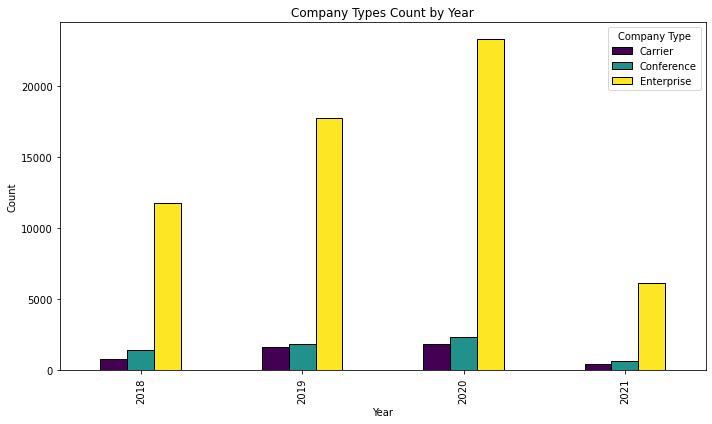

In [ ]:
# Pivot the DataFrame to get company types as columns
pivot_df = company_yoy.pivot(index='year', columns='company_type', values='count')

# Plot the bar chart
ax = pivot_df.plot(kind='bar', figsize=(10, 6), colormap='viridis', edgecolor='black')
plt.xlabel("Year")
plt.ylabel("Count")
plt.title("Company Types Count by Year")
plt.legend(title="Company Type")

# Show the plot
plt.tight_layout()
plt.show()

# Model Building & Evaluation

## Random Forest

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Create X (features) and y (target variable)
X = df[feature_cols].drop(columns=[target_col])
# Volume_tests is the target variable
y = df[target_col]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Initialize the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Calculate the RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

Root Mean Squared Error (RMSE): 377.00


In [ ]:
# Test Data with Prediction
Test_data_with_Prediction = pd.concat([X_test, y_test], axis=1)
Test_data_with_Prediction["Prediction"] = y_pred

# Key Columns with features and Prediciton
Test_data_with_Prediction = pd.merge(df[key_cols], Test_data_with_Prediction, left_index=True, right_index=True)
Test_data_with_Prediction.head()

,company_id,company_type,date,numbers_tested,outage_sec,pesq_times_tests,month,total_tests,quality_too_poor,temporarily_unable_test,...,avg_pesq_score,followup_tests,day_of_week,followup_ratio,number_test_types,has_min_commit,number_busy,year,volume_tests,Prediction
4,10,Enterprise,2018-01-01,13,0.00,43.830306,1,13,0,0,...,3.371562,0,0,0.0,1,0,0,2018,672,623.48
32,12,Enterprise,2018-01-02,53,24.00,193.785331,1,53,1,0,...,3.656327,0,1,0.0,1,0,1,2018,53,64.13
33,17,Enterprise,2018-01-02,37,0.00,145.519594,1,37,0,0,...,3.932962,0,1,0.0,1,0,7,2018,1814,1767.79
36,24,Conference,2018-01-02,80,88.35,320.881040,1,80,0,0,...,4.011013,0,1,0.0,1,1,1,2018,80,83.62
40,30,Enterprise,2018-01-02,49,0.00,168.958541,1,49,1,0,...,3.448133,0,1,0.0,4,1,1,2018,404,404.27


In [ ]:
Test_data_with_Prediction.tail()

,company_id,company_type,date,numbers_tested,outage_sec,pesq_times_tests,month,total_tests,quality_too_poor,temporarily_unable_test,...,avg_pesq_score,followup_tests,day_of_week,followup_ratio,number_test_types,has_min_commit,number_busy,year,volume_tests,Prediction
108741,360,Enterprise,2021-03-25,5,0.0,21.152975,3,5,0,0,...,4.230595,0,3,0.0,1,0,0,2021,84,83.010000
108747,400,Conference,2021-03-25,1,0.0,3.865455,3,1,0,0,...,3.865455,0,3,0.0,1,0,0,2021,11,11.200000
108748,401,Conference,2021-03-25,2,0.0,7.498333,3,2,0,0,...,3.749166,0,3,0.0,2,0,0,2021,51,49.120000
108750,407,Enterprise,2021-03-25,30,432.0,124.020360,3,30,1,5,...,4.134012,0,3,0.0,2,0,2,2021,732,585.020000
108755,420,Enterprise,2021-03-25,2,0.0,0.000000,3,2,0,0,...,0.000000,0,3,0.0,1,0,0,2021,8,8.074286


In [ ]:
# Write Prediction data
Test_data_with_Prediction.to_csv(path + "\\" + 'Test_data_with_Prediction.csv')

Text(0.5, 1.0, 'Global Feature Importance - Built-in Method')

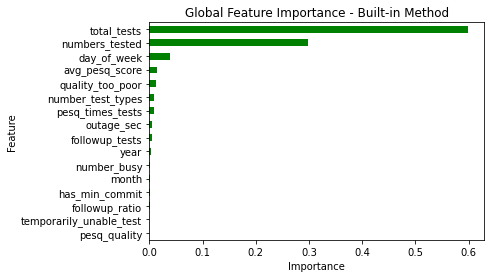

In [ ]:
# Identify Important Feature
global_importances = pd.Series(rf_model.feature_importances_, index=X_train.columns)
global_importances.sort_values(ascending=True, inplace=True)
global_importances.plot.barh(color='green')
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title(" Feature Importance ")

In [ ]:
global_importances

pesq_quality               0.000192
temporarily_unable_test    0.000323
followup_ratio             0.000845
has_min_commit             0.001119
month                      0.001735
number_busy                0.001789
year                       0.003096
followup_tests             0.004356
outage_sec                 0.005930
pesq_times_tests           0.008718
number_test_types          0.008971
quality_too_poor           0.012340
avg_pesq_score             0.014810
day_of_week                0.038271
numbers_tested             0.298534
total_tests                0.598970
dtype: float64